In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

##Load dataset of IRIS folwer

In [186]:
df=pd.read_csv('/content/Iris_flower_data.csv',header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm\
Target:
   5. class: \
      -- Iris Setosa\
      -- Iris Versicolour\
      -- Iris Virginica\

In [187]:
#Rename column of dataset
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [188]:
#class column unique
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [189]:
#shape of dataset
df.shape

(150, 5)

In [190]:
# Display the first few rows of the dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis (EDA)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [192]:
#data summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [193]:
df['class'].value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [194]:
#convering the categorcal column class in to numerical
df['class'] = df['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

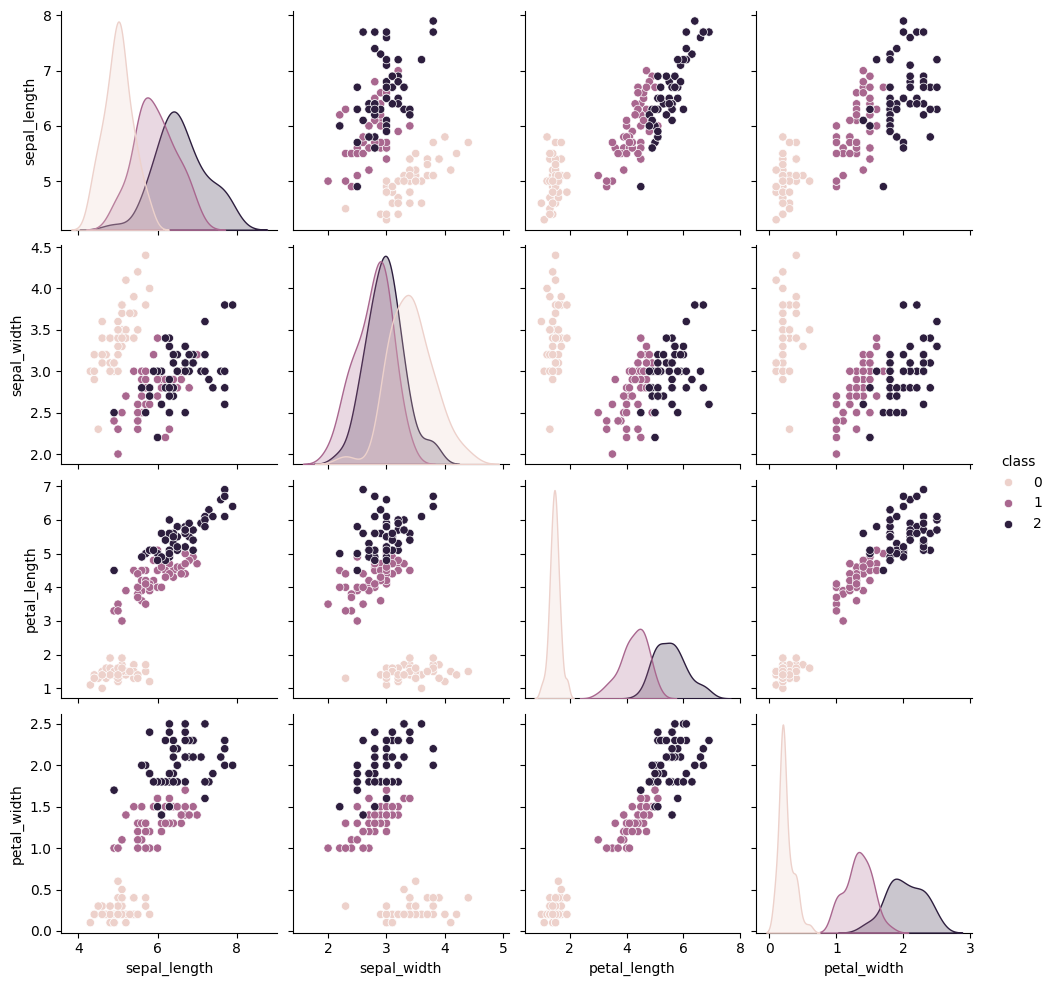

In [195]:
sns.pairplot(data=df, hue="class")
plt.show()

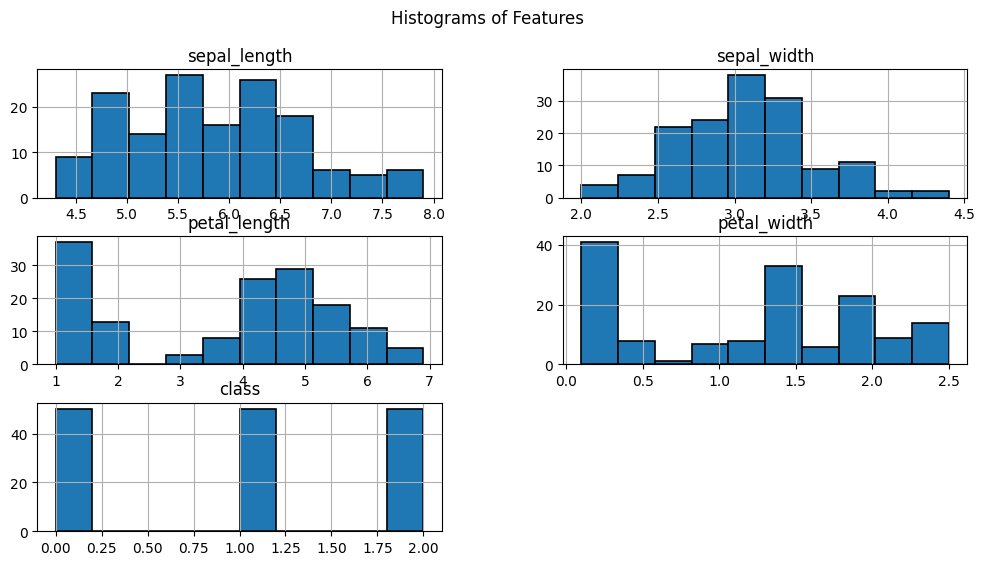

In [196]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(12, 6))
plt.suptitle('Histograms of Features')
plt.show()

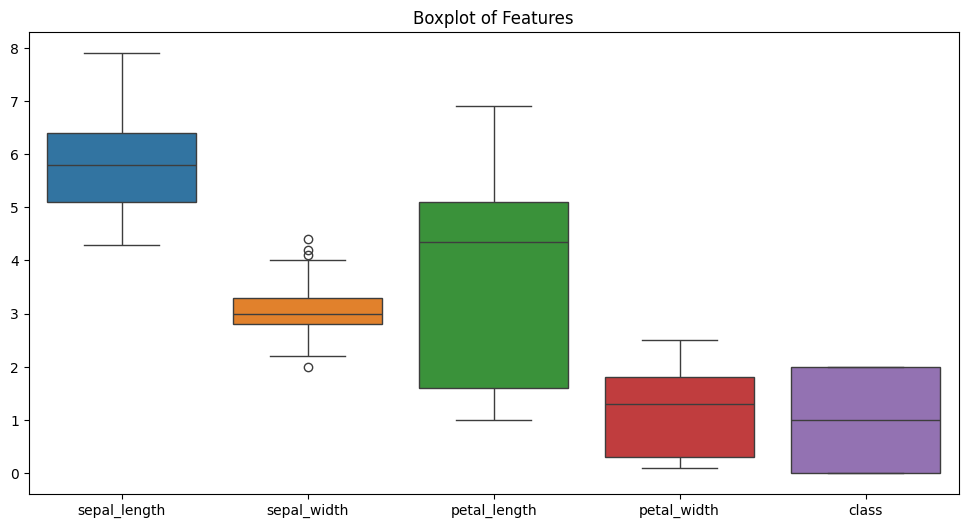

In [197]:
#boxplot on feature distibution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.show()

#comparision class with all feature

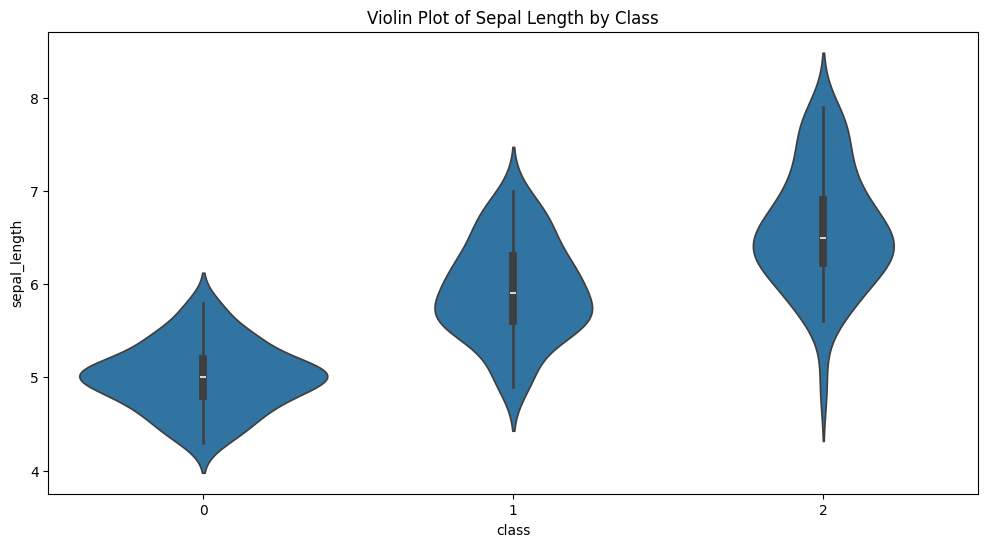

In [198]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='class', y='sepal_length', data=df)
plt.title('Violin Plot of Sepal Length by Class')
plt.show()

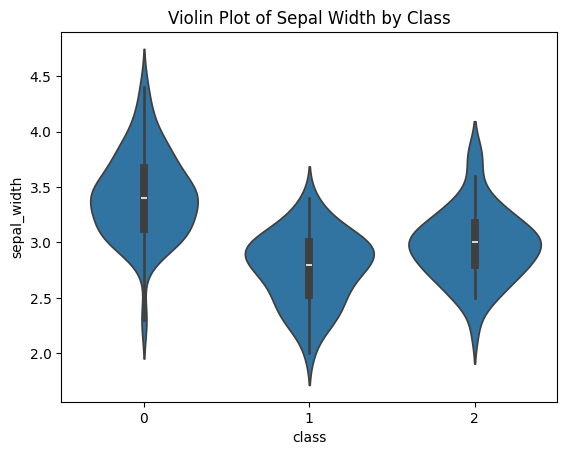

In [199]:
sns.violinplot(x='class', y='sepal_width', data=df)
plt.title('Violin Plot of Sepal Width by Class')
plt.show()

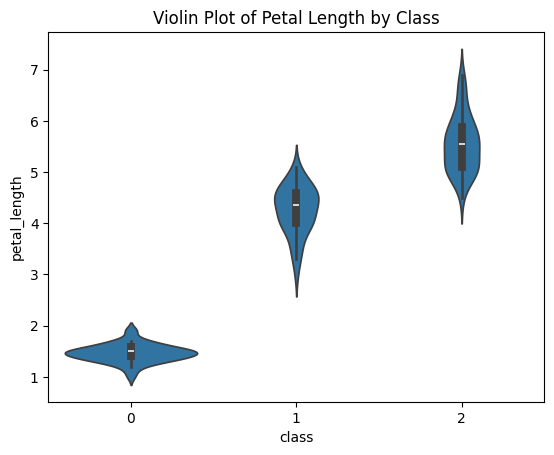

In [200]:
sns.violinplot(x='class', y='petal_length', data=df)
plt.title('Violin Plot of Petal Length by Class')
plt.show()

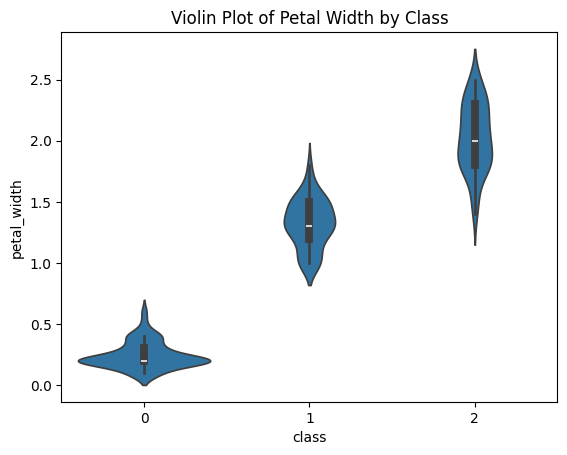

In [201]:
sns.violinplot(x='class', y='petal_width', data=df)
plt.title('Violin Plot of Petal Width by Class')
plt.show()

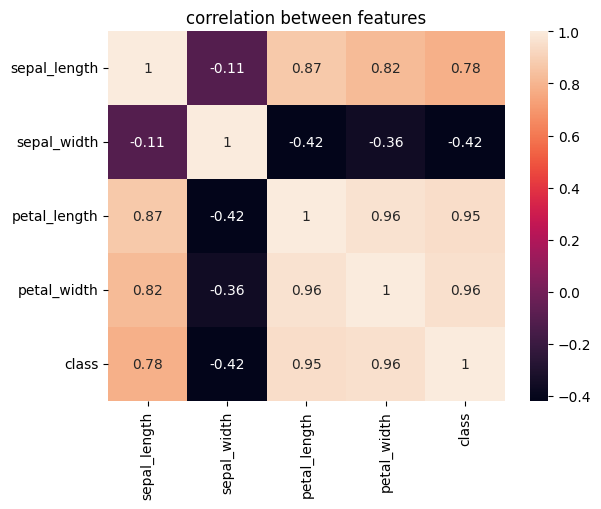

In [202]:
#correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.title('correlation between features')
plt.show()

#spliting the data in to train and test dataset

In [203]:
# Data Preprocessing
X = df.drop('class', axis=1)
y = df['class']

In [204]:
# Split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Builing model to detect class



In [205]:
#decision tree classifier
dtc = DecisionTreeClassifier(criterion = "entropy",random_state =0)
model = dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)

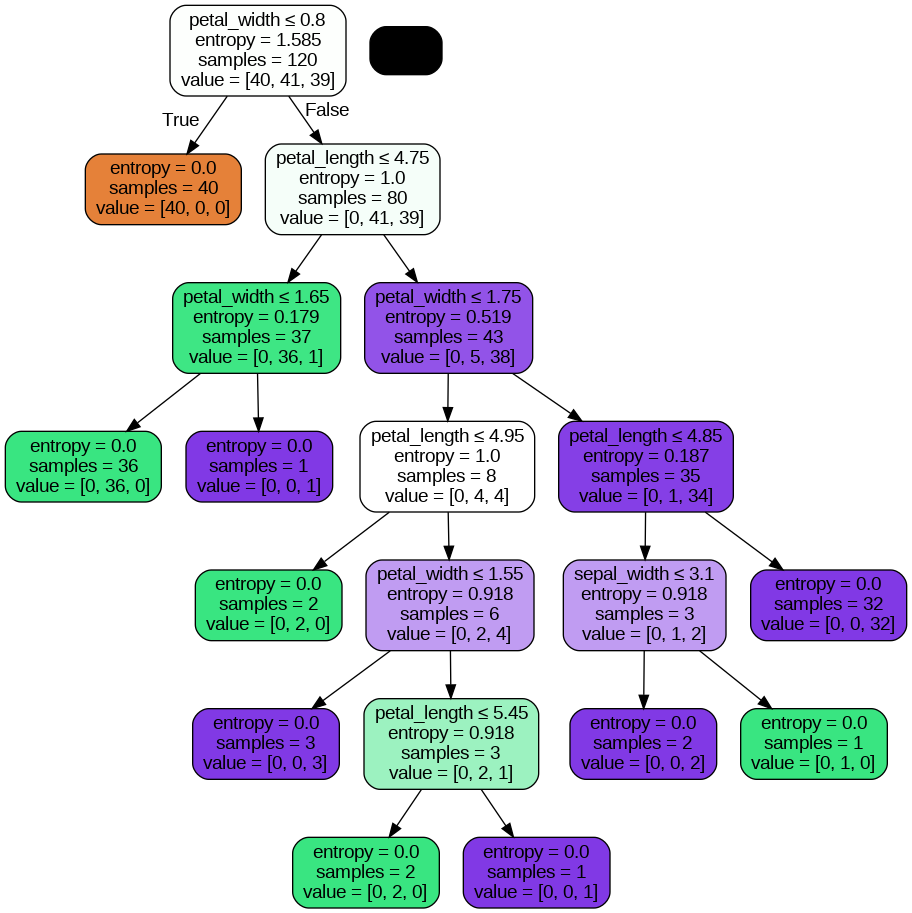

In [206]:
# Visualize and save the Decision Tree
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=df.columns.drop('class'),
                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
image = graph.create_png()

# Display the image in a Jupyter notebook (if running in one)
Image(image)

#save image of decision tree

In [207]:
from IPython.display import Image
# Save the image to a file
with open("decision_tree.png", "wb") as png_file:
    png_file.write(image)

#Apply all model to train

In [208]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Neighbors': KNeighborsClassifier()
}

In [209]:
# Train and evaluate the models
best_model_name = ''
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'R² Score: {r2}')

Model: Logistic Regression
Accuracy: 1.0
MSE: 0.0
MAE: 0.0
R² Score: 1.0
Model: Decision Tree
Accuracy: 1.0
MSE: 0.0
MAE: 0.0
R² Score: 1.0
Model: Random Forest
Accuracy: 1.0
MSE: 0.0
MAE: 0.0
R² Score: 1.0
Model: Gradient Boosting
Accuracy: 1.0
MSE: 0.0
MAE: 0.0
R² Score: 1.0
Model: AdaBoost
Accuracy: 1.0
MSE: 0.0
MAE: 0.0
R² Score: 1.0
Model: Support Vector Classifier
Accuracy: 1.0
MSE: 0.0
MAE: 0.0
R² Score: 1.0
Model: K-Neighbors
Accuracy: 1.0
MSE: 0.0
MAE: 0.0
R² Score: 1.0


#Find the best model

In [210]:
if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model
        print(f'Best Model: {name}')

Best Model: K-Neighbors


#Exporting model/Save model

In [211]:
# Save the best model
import pickle
# Save the best model using pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

##NEXT DEPLOY using FLASK skeleton to detect flower species